In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import glob
import os
import pickle
import json
from tqdm import tqdm

In [3]:
lrw_path = '/media/taylorpap/1TBM2/DatasetML/lipread_mp4'
landmarks_path = '/media/taylorpap/1TBM2/DatasetML/Capstone/LANDMARKS'
folder = 'test'

In [4]:
face_points = glob.glob(os.path.join(landmarks_path, '*', folder, '*.npz'))

In [5]:
print(face_points[0])

/media/taylorpap/1TBM2/DatasetML/Capstone/LANDMARKS/ABOUT/test/ABOUT_00019.npz


In [6]:
example = np.load('/media/taylorpap/1TBM2/DatasetML/Capstone/LANDMARKS/ABOUT/test/ABOUT_00001.npz', allow_pickle=True)['data']
print(example)
for each_frame in example[2:4]:
    print(each_frame)

[{'oval_landmarks': array([[0.28191882, 0.53480649],
        [0.75067544, 0.33600596],
        [0.33846933, 0.67448819],
        [0.50211412, 0.19708052],
        [0.70176679, 0.64115691],
        [0.59260929, 0.75533855],
        [0.45696646, 0.76977801],
        [0.39184093, 0.73128533],
        [0.36621845, 0.70725149],
        [0.27917475, 0.29277426],
        [0.50575042, 0.77606356],
        [0.7177254 , 0.25673848],
        [0.723571  , 0.59469253],
        [0.26951459, 0.33284777],
        [0.62859827, 0.20715961],
        [0.31720066, 0.6388191 ],
        [0.42071563, 0.75347704],
        [0.29754183, 0.25515676],
        [0.2971909 , 0.59187591],
        [0.74718148, 0.48437819],
        [0.37931848, 0.20652872],
        [0.75109196, 0.43522808],
        [0.6831975 , 0.2262947 ],
        [0.5700714 , 0.19892544],
        [0.27564514, 0.48122483],
        [0.75481701, 0.38684139],
        [0.32859519, 0.22537202],
        [0.74002278, 0.53784496],
        [0.27178246, 0.431874

In [9]:
example2 = np.load('/media/taylorpap/1TBM2/DatasetML/Capstone/20words_mean_face.npy')
print(example2)

[[ 70.92383848  97.13757949]
 [ 72.62515288 114.90361188]
 [ 75.98941827 131.07402473]
 [ 79.26959318 146.2116596 ]
 [ 83.61348894 163.26020701]
 [ 91.33134186 177.44535288]
 [100.27169245 187.0885567 ]
 [112.12435016 196.00353535]
 [130.74175801 200.52998862]
 [149.8553027  195.31198065]
 [163.101687   186.44060881]
 [173.65334172 176.57250158]
 [182.43614459 162.27992572]
 [187.16738556 145.09391978]
 [190.22905333 129.72418731]
 [193.02118502 113.45923358]
 [194.43863372  95.5795392 ]
 [ 81.33095967  80.79544511]
 [ 87.75906556  75.27980275]
 [ 96.22692544  73.83857497]
 [104.55524335  74.74029382]
 [112.23186144  76.97670954]
 [144.49576387  76.42387471]
 [152.34799901  73.83329748]
 [161.13054079  72.63570385]
 [170.58715674  73.84785054]
 [178.21409885  79.43802857]
 [128.7337425   95.35962566]
 [128.48854473 106.92459506]
 [128.24475936 118.27285086]
 [128.26596547 127.69870727]
 [118.76000113 135.19357677]
 [122.96307973 136.14619774]
 [128.87017961 137.30253356]
 [134.9428314 

In [15]:
print(len(example))

29


In [16]:
def add_temp_to_main_dict(temp_dict, main_dict):
    for k,v in temp_dict.items():
        if k in main_dict:
            #temp_list = [main_dict[k]]
            #temp_list.append(v)
            #main_dict[k] = temp_list
            main_dict[k].append(v)
        else:
            main_dict[k] = []
            main_dict[k].append(v)

In [17]:
def add_each_list(temp_dict, main_dict):
    for k,v in temp_dict.items():
        if k in main_dict:
            main_dict[k] = main_dict[k] + temp_dict[k]
        else:
            main_dict[k] = v

In [9]:
index_dicts = {}
for frame_number in range(0,len(example)):
    temp_dict = {}
    if example[frame_number]['oval_landmarks'].any() == np.array(None):
        print("Missing Frame. Skipping.")
    else:
        index_number = 0
        for x,y in example[frame_number]['oval_landmarks']:
            #temp_dict[str(index_number) + 'x'] = x
            #temp_dict[str(index_number) + 'y'] = y
            temp_dict[str(index_number)] = [x,y]
            index_number+=1
    add_temp_to_main_dict(temp_dict, index_dicts)

print(index_dicts)


{'0': [0.28191882371902466, 0.534806489944458, [0.27225998044013977, 0.5334029197692871], [0.27514129877090454, 0.5356101393699646], [0.27356094121932983, 0.5353142619132996], [0.27580446004867554, 0.5356316566467285], [0.27941447496414185, 0.5367450714111328], [0.27917495369911194, 0.5395606160163879], [0.27437305450439453, 0.54530930519104], [0.27059459686279297, 0.5433750748634338], [0.2744046747684479, 0.5437964200973511], [0.27641624212265015, 0.5431554317474365], [0.27357789874076843, 0.5420661568641663], [0.27365273237228394, 0.5473806858062744], [0.2713993191719055, 0.5476852655410767], [0.27313733100891113, 0.5363450646400452], [0.2815340757369995, 0.5411590337753296], [0.28166496753692627, 0.5525980591773987], [0.2735545039176941, 0.5493337512016296], [0.26916903257369995, 0.5454045534133911], [0.2691340148448944, 0.5393500328063965], [0.2669892907142639, 0.5430806279182434], [0.26556792855262756, 0.5436878800392151], [0.26980364322662354, 0.5472558736801147], [0.269702851772

In [19]:
index_dicts = {}
for frame_number in range(0,len(example)):
    temp_dict = {}
    if example[frame_number]['oval_landmarks'].any() == np.array(None):
        print("Missing Frame. Skipping.")
    else:
        index_number = 0
        for x in example[frame_number]['oval_landmarks']:
            #temp_dict[str(index_number) + 'x'] = x
            #temp_dict[str(index_number) + 'y'] = y
            temp_dict[str(index_number)] = list(x)
            index_number+=1
    add_temp_to_main_dict(temp_dict, index_dicts)

print(index_dicts)

{'0': [[0.28191882371902466, 0.534806489944458], [0.27225998044013977, 0.5334029197692871], [0.27514129877090454, 0.5356101393699646], [0.27356094121932983, 0.5353142619132996], [0.27580446004867554, 0.5356316566467285], [0.27941447496414185, 0.5367450714111328], [0.27917495369911194, 0.5395606160163879], [0.27437305450439453, 0.54530930519104], [0.27059459686279297, 0.5433750748634338], [0.2744046747684479, 0.5437964200973511], [0.27641624212265015, 0.5431554317474365], [0.27357789874076843, 0.5420661568641663], [0.27365273237228394, 0.5473806858062744], [0.2713993191719055, 0.5476852655410767], [0.27313733100891113, 0.5363450646400452], [0.2815340757369995, 0.5411590337753296], [0.28166496753692627, 0.5525980591773987], [0.2735545039176941, 0.5493337512016296], [0.26916903257369995, 0.5454045534133911], [0.2691340148448944, 0.5393500328063965], [0.2669892907142639, 0.5430806279182434], [0.26556792855262756, 0.5436878800392151], [0.26980364322662354, 0.5472558736801147], [0.2697028517

In [20]:
def create_dict_of_points(npz_path):
    index_dicts = {}
    points_data = np.load(npz_path, allow_pickle=True)['data']
    for frame_number in range(len(points_data)):
        temp_dict = {}
        if points_data[frame_number]['oval_landmarks'].any() == np.array(None):
            pass
        else:
            index_number = 0
            for x in points_data[frame_number]['oval_landmarks']:
                temp_dict[str(index_number)] = list(x)
                index_number+=1
        add_temp_to_main_dict(temp_dict, index_dicts)
    return index_dicts

In [21]:
beyond_massive_dict = {}
for i in tqdm(face_points[:6000]):
    current_dict = create_dict_of_points(i)
    if current_dict:
        add_each_list(current_dict, beyond_massive_dict)
pickle_out = open('/home/taylorpap/Bootcamp/dict_points_new.pickle', 'wb')
pickle.dump(beyond_massive_dict, pickle_out)
pickle_out.close()

100%|██████████| 1701/1701 [00:55<00:00, 30.70it/s]


In [22]:
print(len(beyond_massive_dict['0']))

49197


In [26]:
dict_of_index_dataframes = {}
for index_name, array_of_points in beyond_massive_dict.items():
    dict_of_index_dataframes[index_name] = pd.DataFrame(array_of_points, columns=['x','y'])

In [27]:
print(dict_of_index_dataframes['0'].head())

          x         y
0  0.305036  0.573280
1  0.359331  0.560731
2  0.353022  0.555824
3  0.346912  0.546775
4  0.350822  0.539210


In [28]:
setup_avgs_dict = {'point_index':[], 'x_avg':[], 'y_avg': [], 'x_std': [], 'y_std': []}
for index_name, current_df in dict_of_index_dataframes.items():
    current_x_avg = current_df['x'].mean()
    current_y_avg = current_df['y'].mean()
    x_stdev = current_df['x'].std()
    y_stdev = current_df['y'].std()
    setup_avgs_dict['point_index'].append(index_name)
    setup_avgs_dict['x_avg'].append(current_x_avg)
    setup_avgs_dict['y_avg'].append(current_y_avg)
    setup_avgs_dict['x_std'].append(x_stdev)
    setup_avgs_dict['y_std'].append(y_stdev)
averages_dataframe = pd.DataFrame(setup_avgs_dict).set_index('point_index')

In [30]:
print(averages_dataframe)

                x_avg     y_avg     x_std     y_std
point_index                                        
0            0.272409  0.544874  0.073640  0.039798
1            0.738801  0.331930  0.075090  0.041947
2            0.334816  0.686310  0.050129  0.031028
3            0.500128  0.185037  0.053039  0.043723
4            0.692908  0.649341  0.063007  0.035237
5            0.582629  0.757030  0.029100  0.020635
6            0.458033  0.772243  0.024721  0.017536
7            0.393931  0.738541  0.033765  0.023411
8            0.366513  0.717011  0.040785  0.026884
9            0.272315  0.290672  0.067880  0.040335
10           0.503091  0.777279  0.023647  0.016608
11           0.706762  0.248884  0.063865  0.039062
12           0.713915  0.601494  0.071802  0.038362
13           0.261346  0.333537  0.072894  0.041322
14           0.621780  0.196066  0.055138  0.033244
15           0.310140  0.651317  0.060064  0.034843
16           0.423358  0.758018  0.027948  0.020033
17          

In [33]:
averages_dataframe.reset_index(inplace=True)

In [34]:
print(averages_dataframe)

   point_index     x_avg     y_avg     x_std     y_std
0            0  0.272409  0.544874  0.073640  0.039798
1            1  0.738801  0.331930  0.075090  0.041947
2            2  0.334816  0.686310  0.050129  0.031028
3            3  0.500128  0.185037  0.053039  0.043723
4            4  0.692908  0.649341  0.063007  0.035237
5            5  0.582629  0.757030  0.029100  0.020635
6            6  0.458033  0.772243  0.024721  0.017536
7            7  0.393931  0.738541  0.033765  0.023411
8            8  0.366513  0.717011  0.040785  0.026884
9            9  0.272315  0.290672  0.067880  0.040335
10          10  0.503091  0.777279  0.023647  0.016608
11          11  0.706762  0.248884  0.063865  0.039062
12          12  0.713915  0.601494  0.071802  0.038362
13          13  0.261346  0.333537  0.072894  0.041322
14          14  0.621780  0.196066  0.055138  0.033244
15          15  0.310140  0.651317  0.060064  0.034843
16          16  0.423358  0.758018  0.027948  0.020033
17        

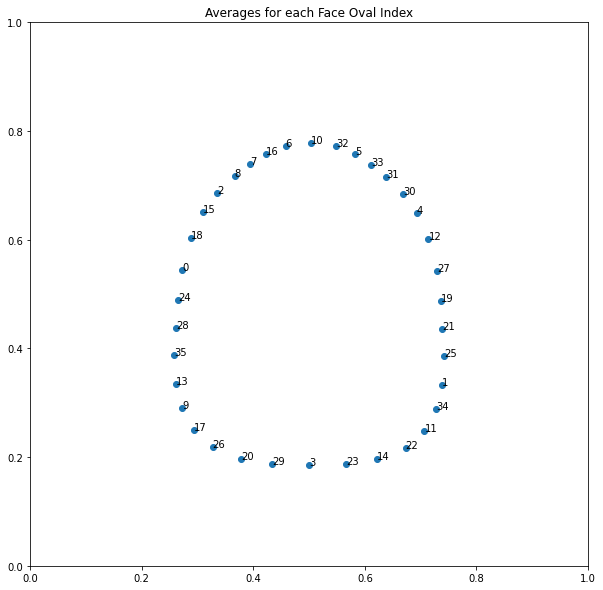

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(data=averages_dataframe, x='x_avg', y='y_avg')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Averages for each Face Oval Index')
for i in range(averages_dataframe.shape[0]):
    plt.text(x=averages_dataframe.x_avg[i], y=averages_dataframe.y_avg[i], s=averages_dataframe.point_index[i])
plt.show()

In [43]:
small_xs = averages_dataframe.sort_values('x_std', axis=0)
print(small_xs)

   point_index     x_avg     y_avg     x_std     y_std
10          10  0.503091  0.777279  0.023647  0.016608
6            6  0.458033  0.772243  0.024721  0.017536
32          32  0.548227  0.771722  0.025234  0.018009
16          16  0.423358  0.758018  0.027948  0.020033
5            5  0.582629  0.757030  0.029100  0.020635
7            7  0.393931  0.738541  0.033765  0.023411
33          33  0.611625  0.737247  0.035605  0.023926
8            8  0.366513  0.717011  0.040785  0.026884
31          31  0.638315  0.715261  0.043219  0.027343
2            2  0.334816  0.686310  0.050129  0.031028
30          30  0.669137  0.684395  0.052962  0.031465
3            3  0.500128  0.185037  0.053039  0.043723
29          29  0.434250  0.187056  0.053414  0.030589
23          23  0.566156  0.186613  0.053649  0.030763
20          20  0.378571  0.196877  0.054455  0.032993
14          14  0.621780  0.196066  0.055138  0.033244
26          26  0.327094  0.218253  0.057643  0.036229
22        

In [45]:
small_ys = averages_dataframe.sort_values('y_std', axis=0)
print(small_ys)

   point_index     x_avg     y_avg     x_std     y_std
10          10  0.503091  0.777279  0.023647  0.016608
6            6  0.458033  0.772243  0.024721  0.017536
32          32  0.548227  0.771722  0.025234  0.018009
16          16  0.423358  0.758018  0.027948  0.020033
5            5  0.582629  0.757030  0.029100  0.020635
7            7  0.393931  0.738541  0.033765  0.023411
33          33  0.611625  0.737247  0.035605  0.023926
8            8  0.366513  0.717011  0.040785  0.026884
31          31  0.638315  0.715261  0.043219  0.027343
29          29  0.434250  0.187056  0.053414  0.030589
23          23  0.566156  0.186613  0.053649  0.030763
2            2  0.334816  0.686310  0.050129  0.031028
30          30  0.669137  0.684395  0.052962  0.031465
20          20  0.378571  0.196877  0.054455  0.032993
14          14  0.621780  0.196066  0.055138  0.033244
15          15  0.310140  0.651317  0.060064  0.034843
4            4  0.692908  0.649341  0.063007  0.035237
26        

In [49]:
averages_array = averages_dataframe[['x_avg','y_avg']].to_numpy()
print(averages_array)

[[0.27240937 0.54487431]
 [0.73880122 0.33192964]
 [0.33481601 0.68631032]
 [0.50012763 0.18503667]
 [0.6929081  0.64934078]
 [0.58262861 0.75702962]
 [0.45803337 0.77224256]
 [0.393931   0.73854092]
 [0.36651285 0.71701137]
 [0.27231471 0.29067173]
 [0.50309121 0.77727919]
 [0.70676224 0.24888358]
 [0.71391535 0.60149356]
 [0.26134608 0.33353728]
 [0.6217797  0.19606587]
 [0.31014001 0.65131695]
 [0.42335793 0.75801846]
 [0.29348477 0.2502826 ]
 [0.28826822 0.6035993 ]
 [0.73576934 0.48730935]
 [0.3785705  0.19687694]
 [0.73846998 0.43584712]
 [0.67324526 0.2170038 ]
 [0.56615552 0.18661315]
 [0.26542639 0.4893263 ]
 [0.74160545 0.38529523]
 [0.3270936  0.21825284]
 [0.72919819 0.54278219]
 [0.26220446 0.43770837]
 [0.43425026 0.18705589]
 [0.66913736 0.68439532]
 [0.63831508 0.7152615 ]
 [0.54822706 0.77172219]
 [0.61162472 0.73724676]
 [0.72779992 0.28913475]
 [0.25879655 0.38704969]]


In [50]:
def save2npz(filename, data=None):
    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))
    np.savez_compressed(filename, data=data)

In [53]:
save2npz('/media/taylorpap/1TBM2/DatasetML/Capstone/face_oval_averages.npz', data=averages_array)

OSError: [Errno 30] Read-only file system: '/media/taylorpap/1TBM2/DatasetML/Capstone/face_oval_averages.npz'

In [56]:
save2npz('/home/taylorpap/Bootcamp/face_oval_averages.npz', data=averages_array)

In [ ]:
#Results:
#When Transforming the Frame in the video, Will use multiple points in the array
#Using points with lower standard deviation value to limit distortion
#Using Points from different areas of face to account for multiple locations in image

#Points chosen [2, 3, 10, 11, 26, 30]